In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../System Manager/Python/employee attrition.csv')

EDA

In [3]:
df.head(10).style.background_gradient(cmap='Dark2_r')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
print('Rows in the dataset =', df.shape[0])
print('Columns in the dataset =', df.shape[1])

Rows in the dataset = 1470
Columns in the dataset = 35


In [6]:
print('Number of null values = ', df.isna().sum().sum())

Number of null values =  0


In [7]:
mapping = {'Yes':1, 'No':0}
df[['Attrition','OverTime']] = df[['Attrition','OverTime']].replace(mapping)

In [8]:
df_int = df.select_dtypes(exclude=['object']).columns
df_num = df[df_int]
df_num.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Age,1470.000000,36.923810,9.135373,18.000000,30.000000,36.000000,43.000000,60.000000
Attrition,1470.000000,0.161224,0.367863,0.000000,0.000000,0.000000,0.000000,1.000000
DailyRate,1470.000000,802.485714,403.509100,102.000000,465.000000,802.000000,1157.000000,1499.000000
DistanceFromHome,1470.000000,9.192517,8.106864,1.000000,2.000000,7.000000,14.000000,29.000000
Education,1470.000000,2.912925,1.024165,1.000000,2.000000,3.000000,4.000000,5.000000
EmployeeCount,1470.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeNumber,1470.000000,1024.865306,602.024335,1.000000,491.250000,1020.500000,1555.750000,2068.000000
EnvironmentSatisfaction,1470.000000,2.721769,1.093082,1.000000,2.000000,3.000000,4.000000,4.000000
HourlyRate,1470.000000,65.891156,20.329428,30.000000,48.000000,66.000000,83.750000,100.000000
JobInvolvement,1470.000000,2.729932,0.711561,1.000000,2.000000,3.000000,3.000000,4.000000


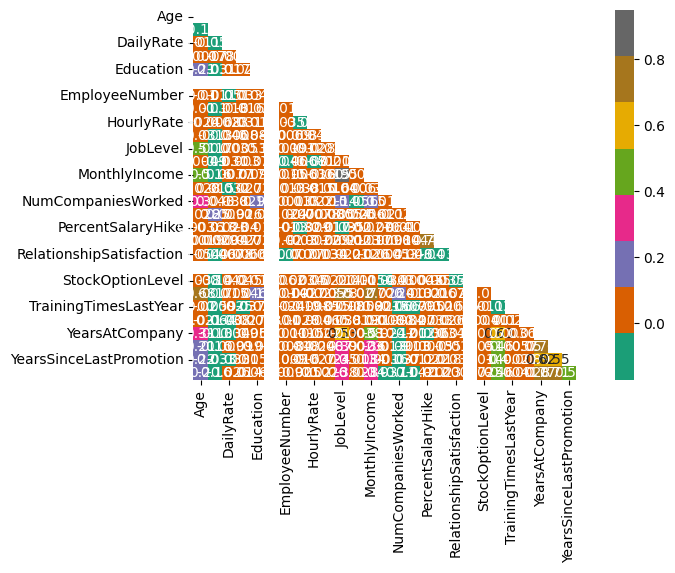

<Figure size 3000x2800 with 0 Axes>

In [9]:
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,annot=True,cmap='Dark2')
plt.figure(figsize=(30,28))
plt.show()

In [10]:
correlation = pd.DataFrame(df_num.corr()['Attrition'])
correlation.sort_values(by='Attrition', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Attrition
Attrition,1.000000
OverTime,0.246118
DistanceFromHome,0.077924
NumCompaniesWorked,0.043494
MonthlyRate,0.015170
PerformanceRating,0.002889
HourlyRate,-0.006846
EmployeeNumber,-0.010577
PercentSalaryHike,-0.013478
Education,-0.031373


### Data Visualization

Text(0.5, 1.0, 'Attrition Class Distributions \n (0  || 1)')

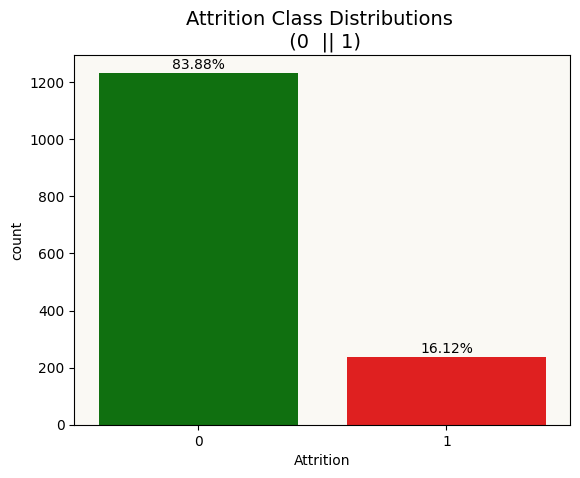

In [11]:
Total = len(df['Attrition'])
colors = ['green','red']

ax = sns.countplot(x= 'Attrition', data=df, palette=colors)
ax.set_facecolor('#faf9f4')
for p in ax.patches:
    percentage = f'{100*p.get_height()/Total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    ax.annotate(percentage, (x, y), ha='center', va='center')
    
plt.title('Attrition Class Distributions \n (0  || 1)', fontsize=14)

In [12]:
def feature_plot(feature):
    plt.figure(figsize=(9,7))
    ax = sns.countplot(x=feature, data=df, palette='cool_r')
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

In [13]:
def feature_plot_with_target(feature):
    plt.figure(figsize=(13,11))
    ax = sns.catplot(x='Attrition', col=feature, kind='count', data=df, palette= 'cool_r')
    for ax in ax.axes.ravel():
        for p in ax.patches:
            ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

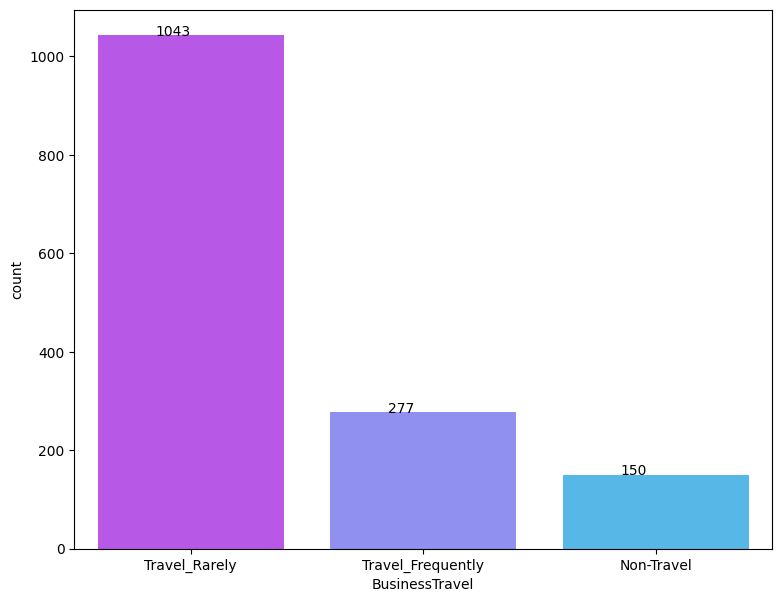

<Figure size 1300x1100 with 0 Axes>

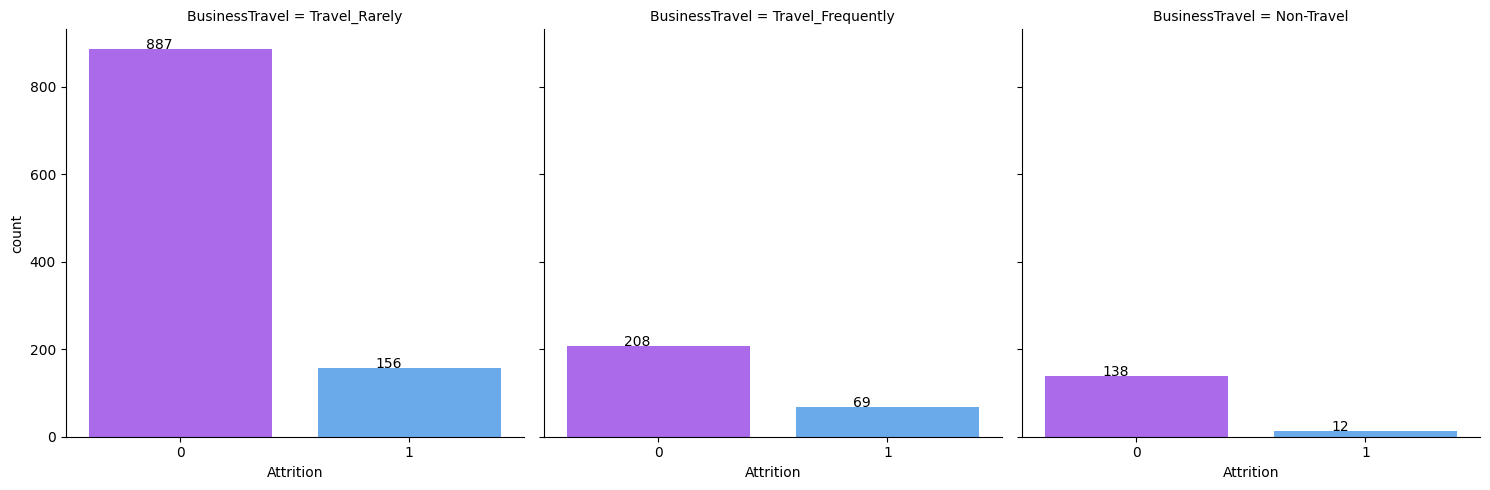

In [14]:
feature_plot('BusinessTravel')
feature_plot_with_target('BusinessTravel')

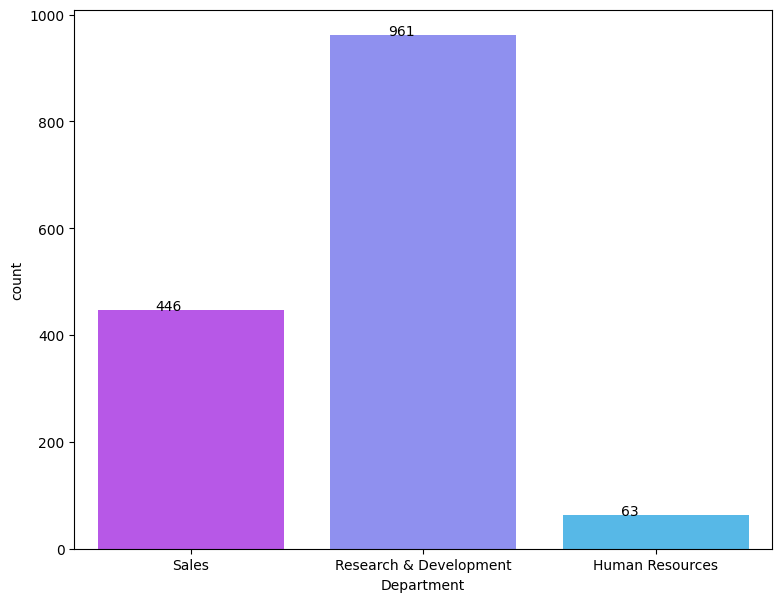

<Figure size 1300x1100 with 0 Axes>

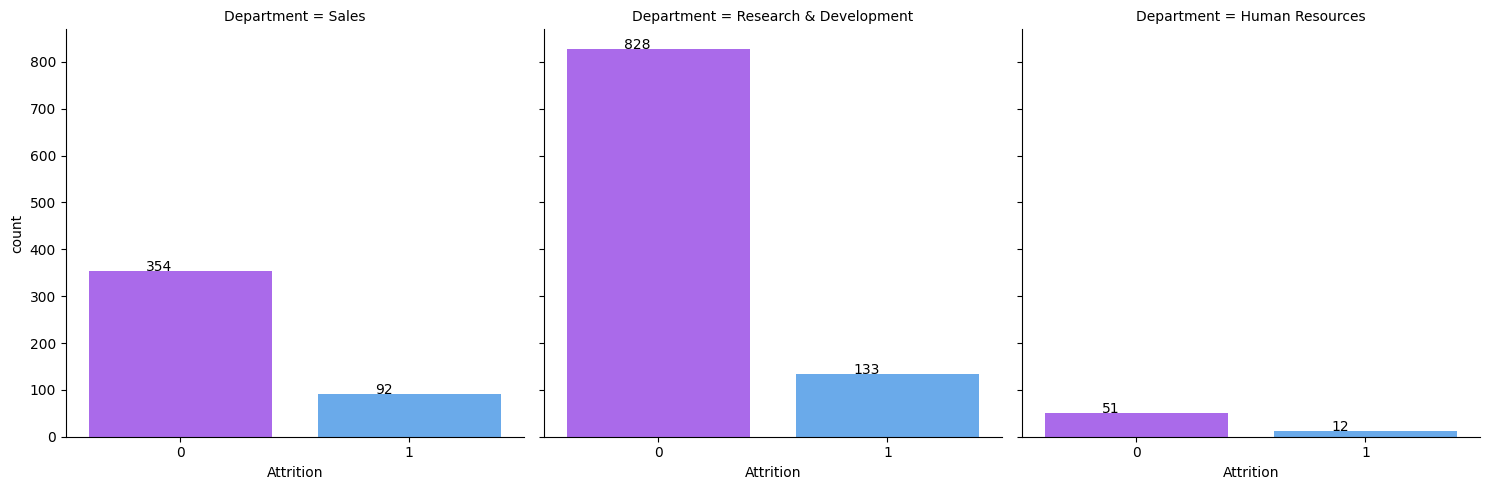

In [15]:
feature_plot('Department')
feature_plot_with_target('Department')

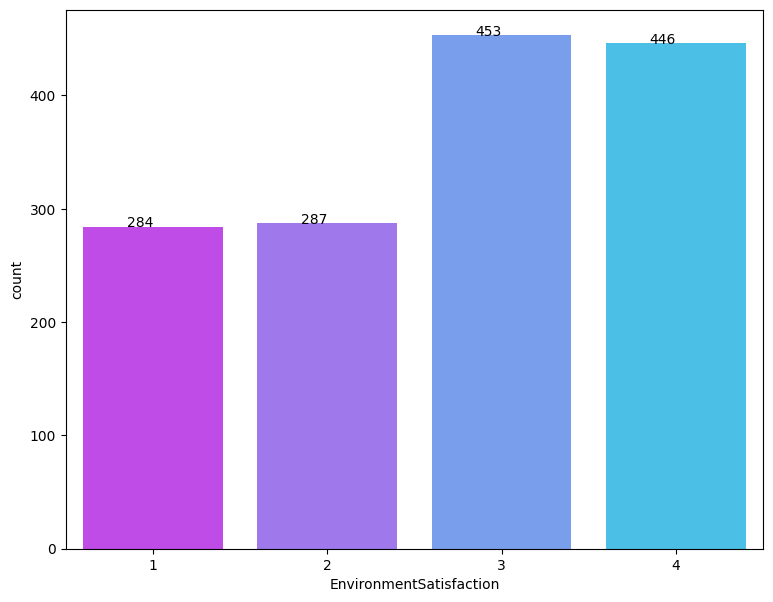

<Figure size 1300x1100 with 0 Axes>

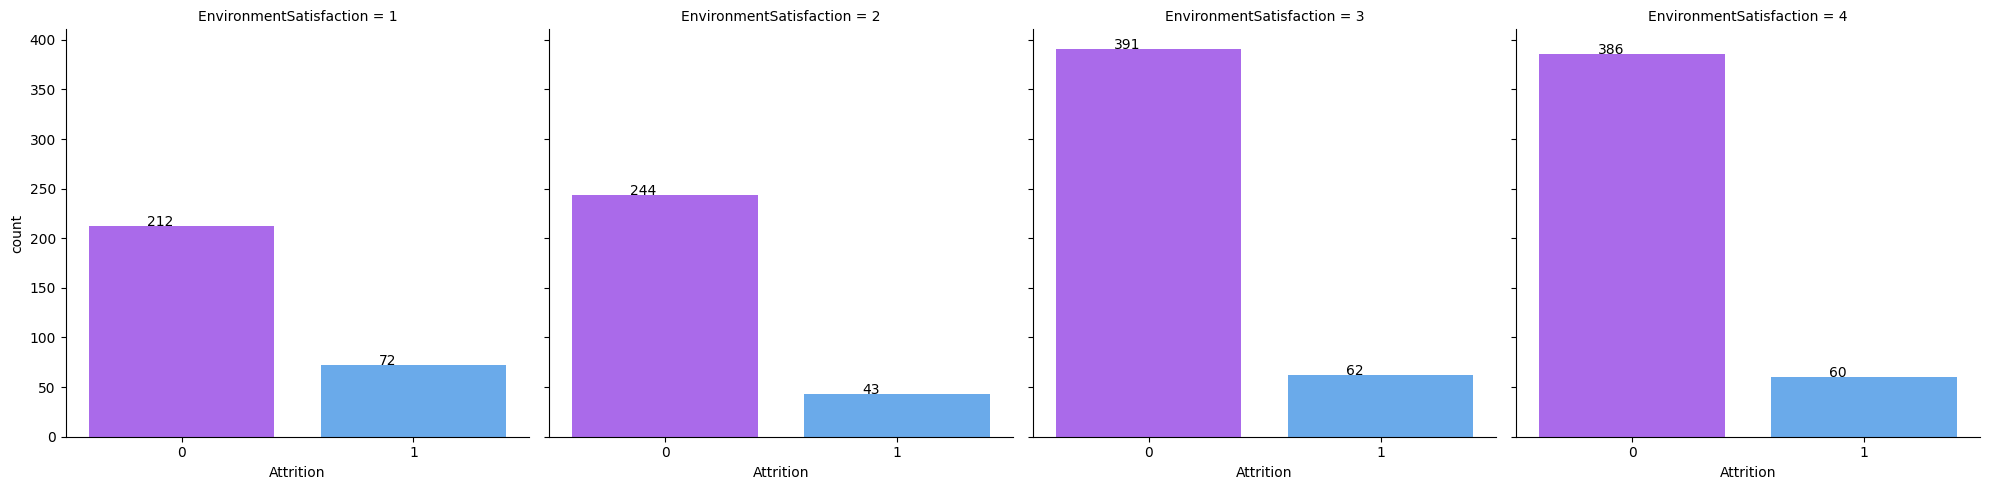

In [16]:
feature_plot('EnvironmentSatisfaction')
feature_plot_with_target('EnvironmentSatisfaction')

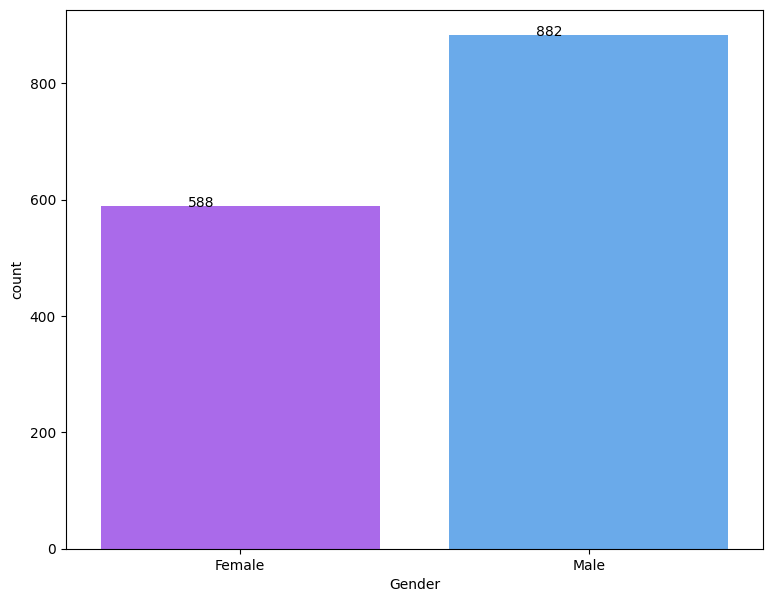

<Figure size 1300x1100 with 0 Axes>

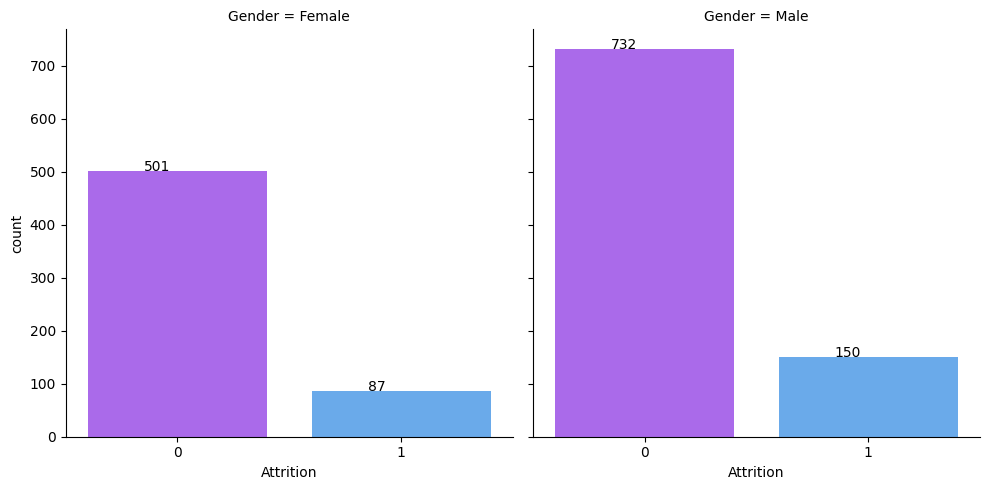

In [17]:
feature_plot('Gender')
feature_plot_with_target('Gender')

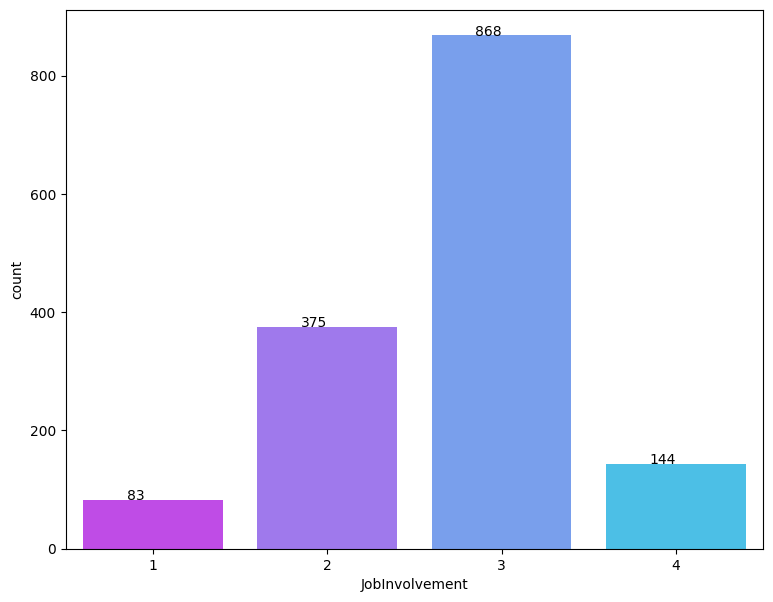

<Figure size 1300x1100 with 0 Axes>

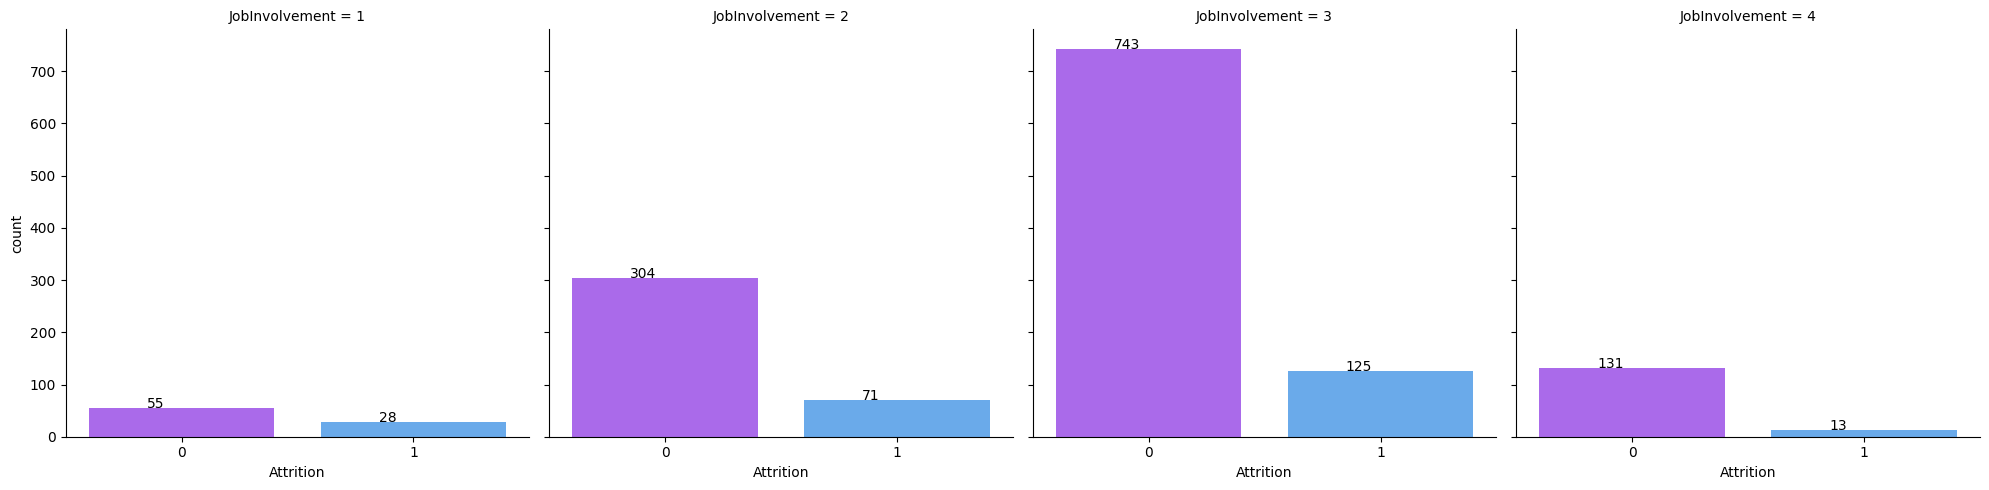

In [18]:
feature_plot('JobInvolvement')
feature_plot_with_target('JobInvolvement')

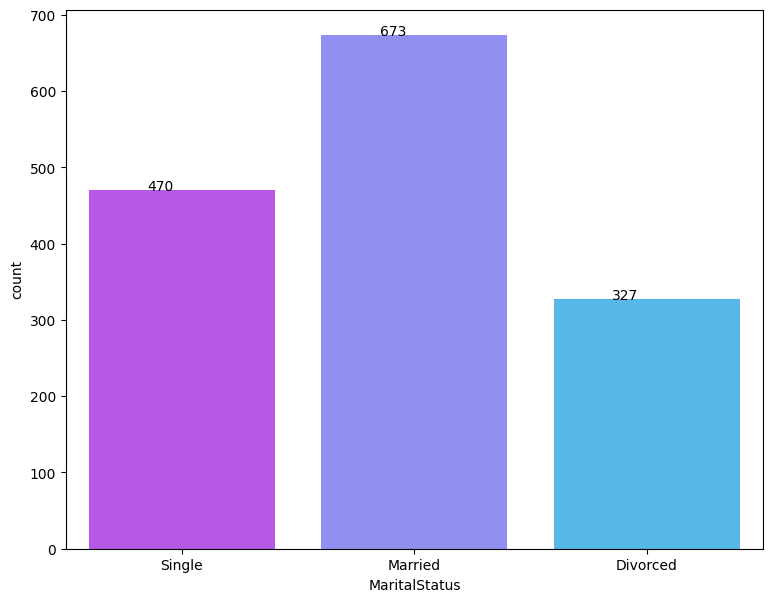

<Figure size 1300x1100 with 0 Axes>

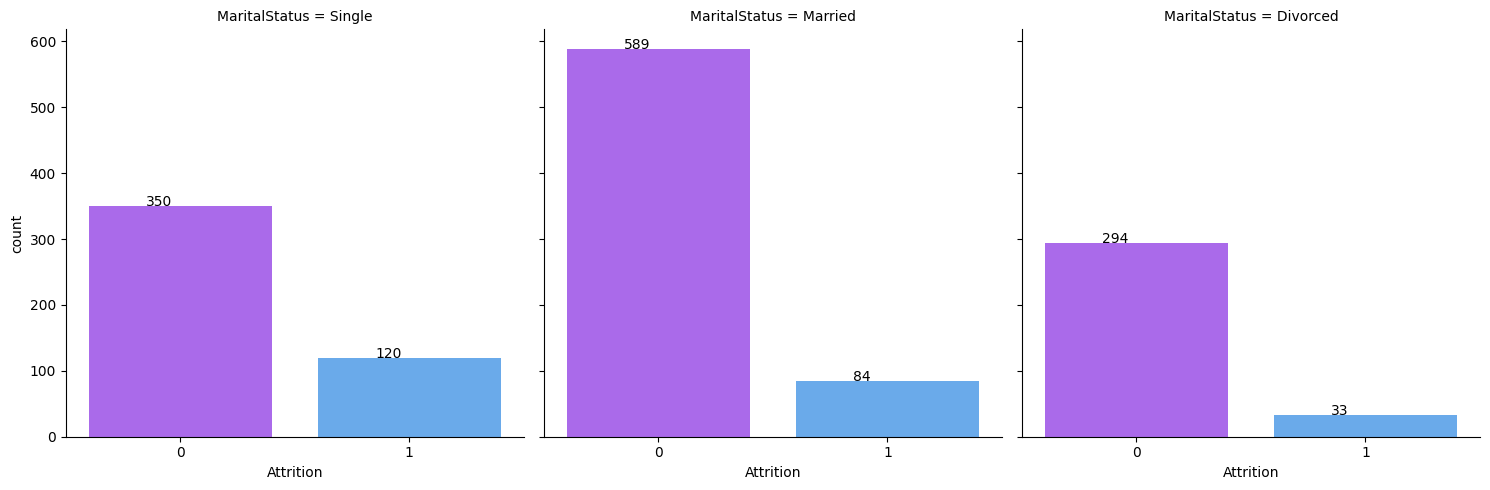

In [19]:
feature_plot('MaritalStatus')
feature_plot_with_target('MaritalStatus')

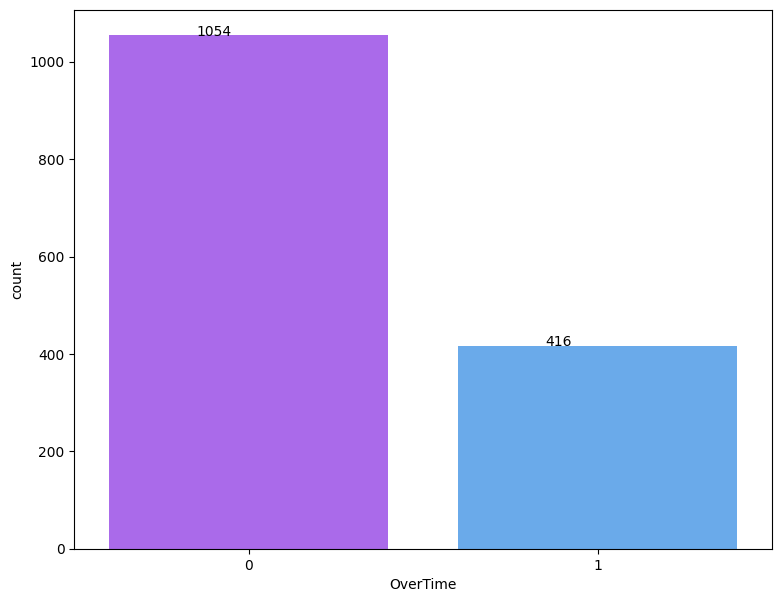

<Figure size 1300x1100 with 0 Axes>

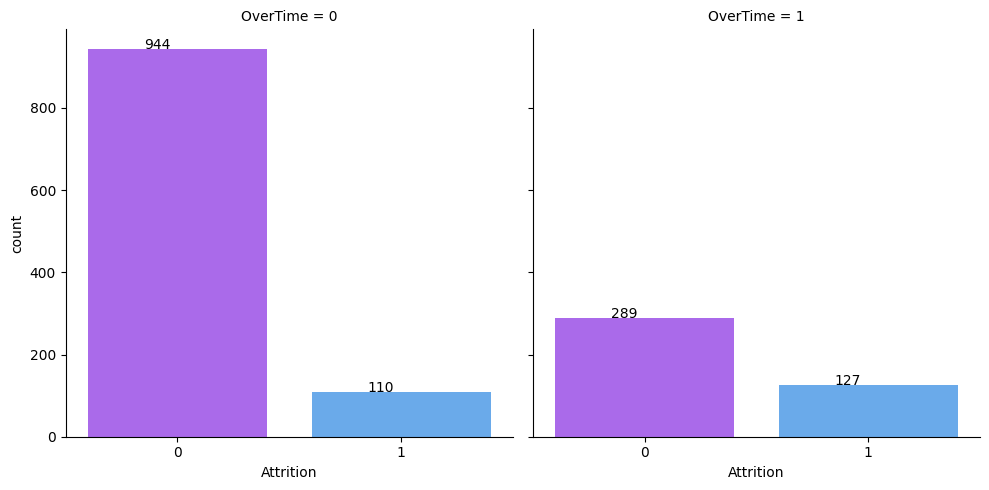

In [20]:
feature_plot('OverTime')
feature_plot_with_target('OverTime')

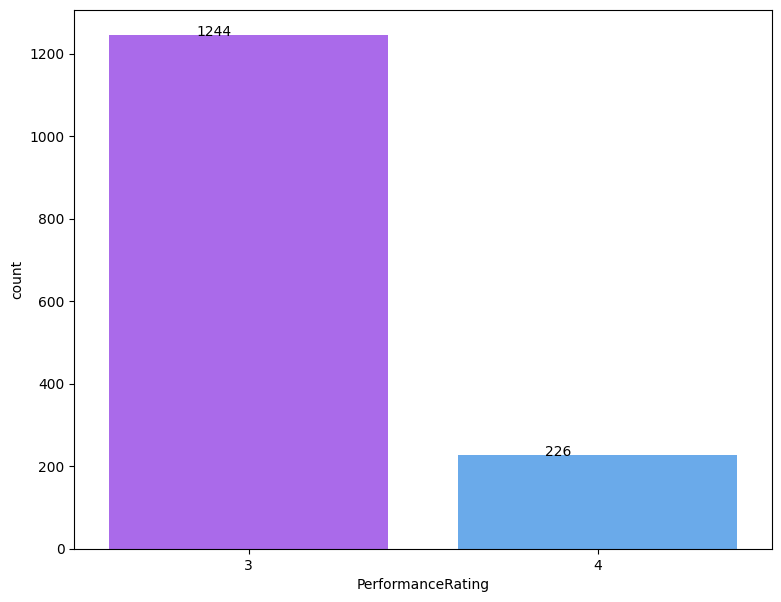

<Figure size 1300x1100 with 0 Axes>

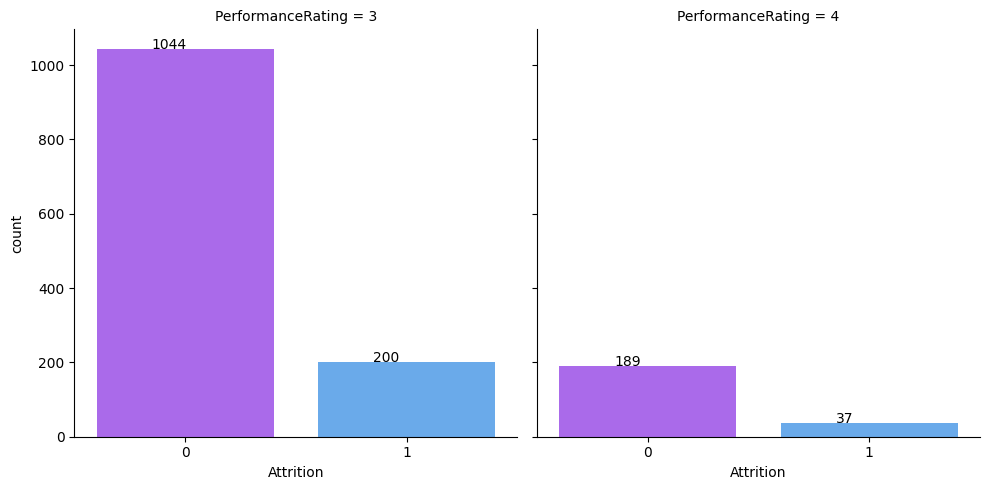

In [21]:
feature_plot('PerformanceRating')
feature_plot_with_target('PerformanceRating')

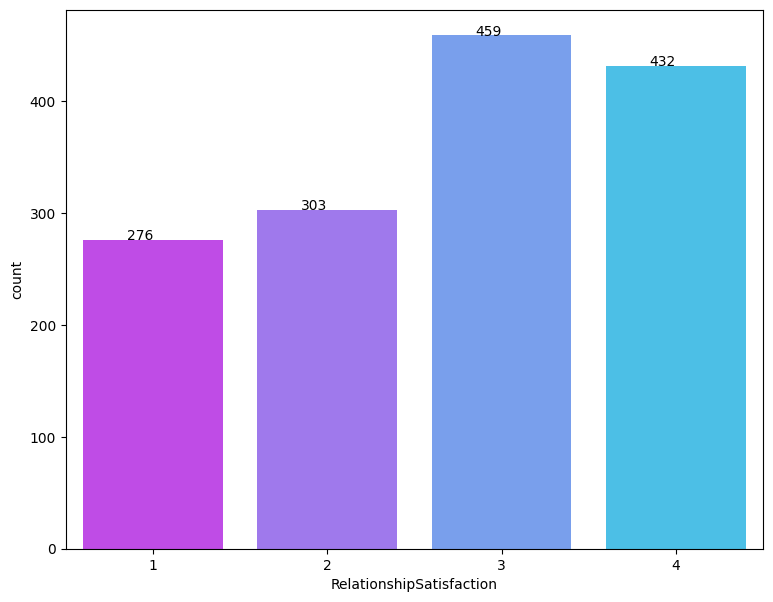

<Figure size 1300x1100 with 0 Axes>

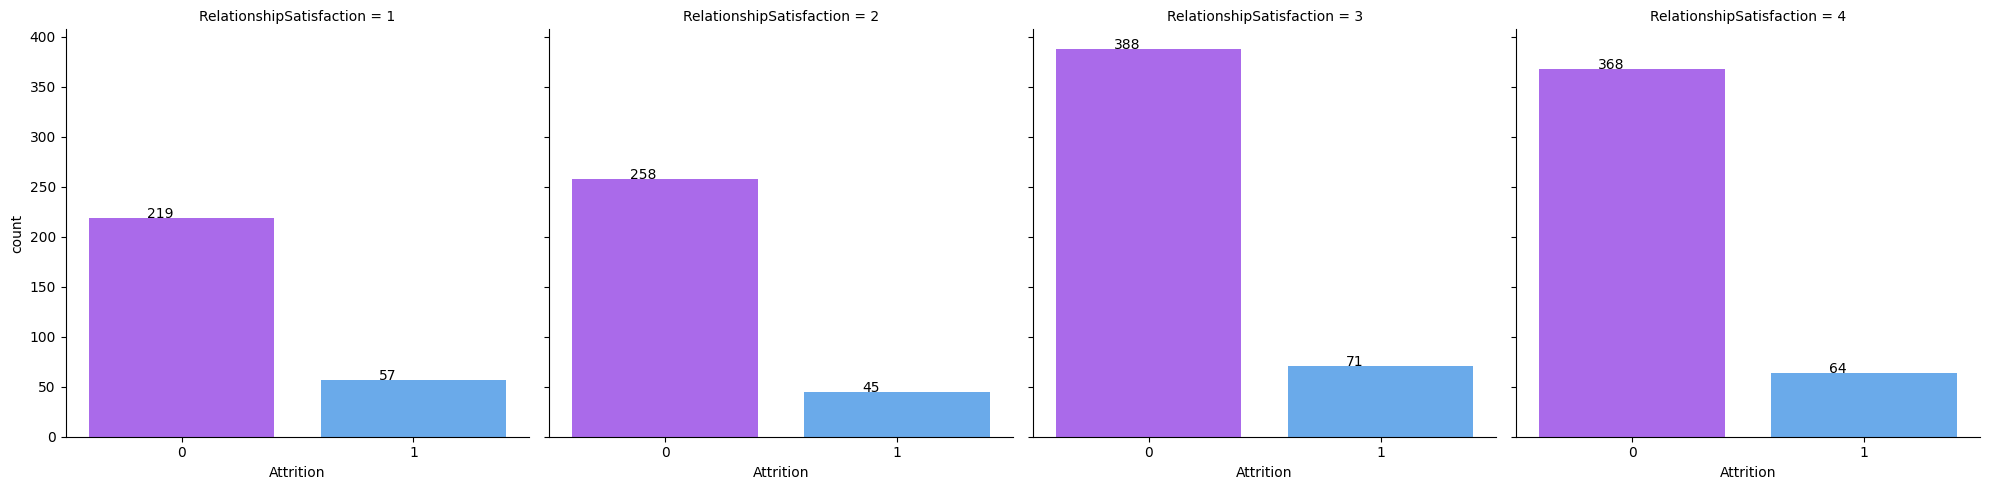

In [22]:
feature_plot('RelationshipSatisfaction')
feature_plot_with_target('RelationshipSatisfaction')

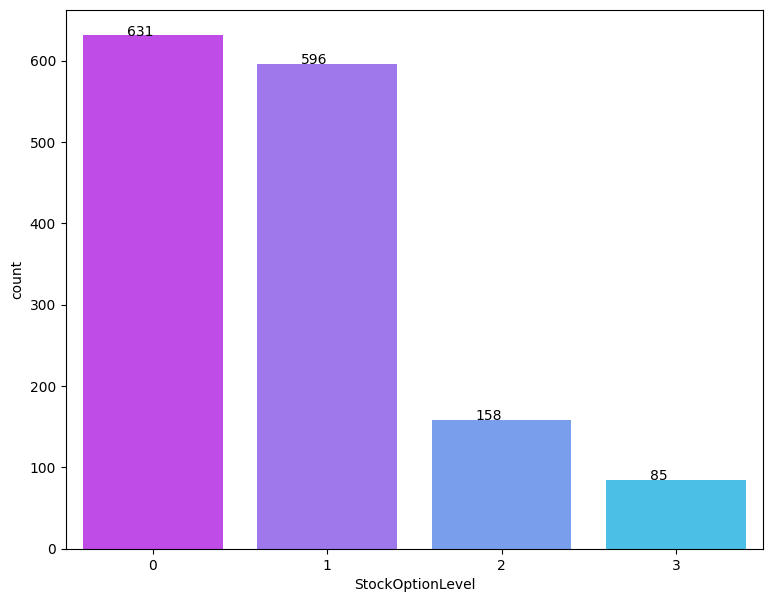

<Figure size 1300x1100 with 0 Axes>

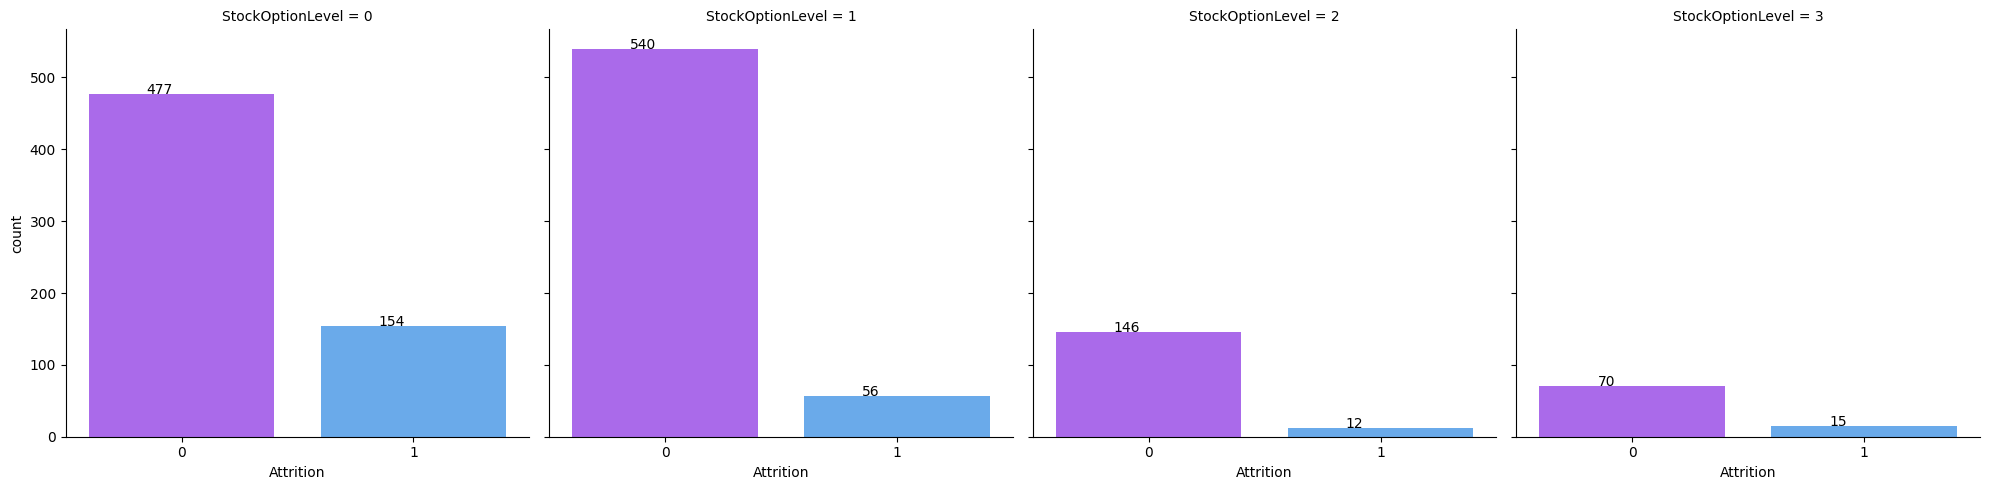

In [23]:
feature_plot('StockOptionLevel')
feature_plot_with_target('StockOptionLevel')

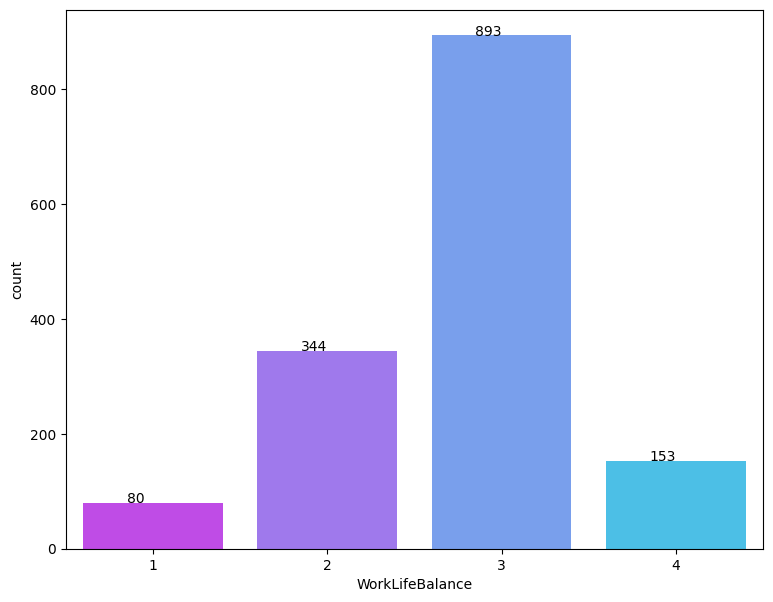

<Figure size 1300x1100 with 0 Axes>

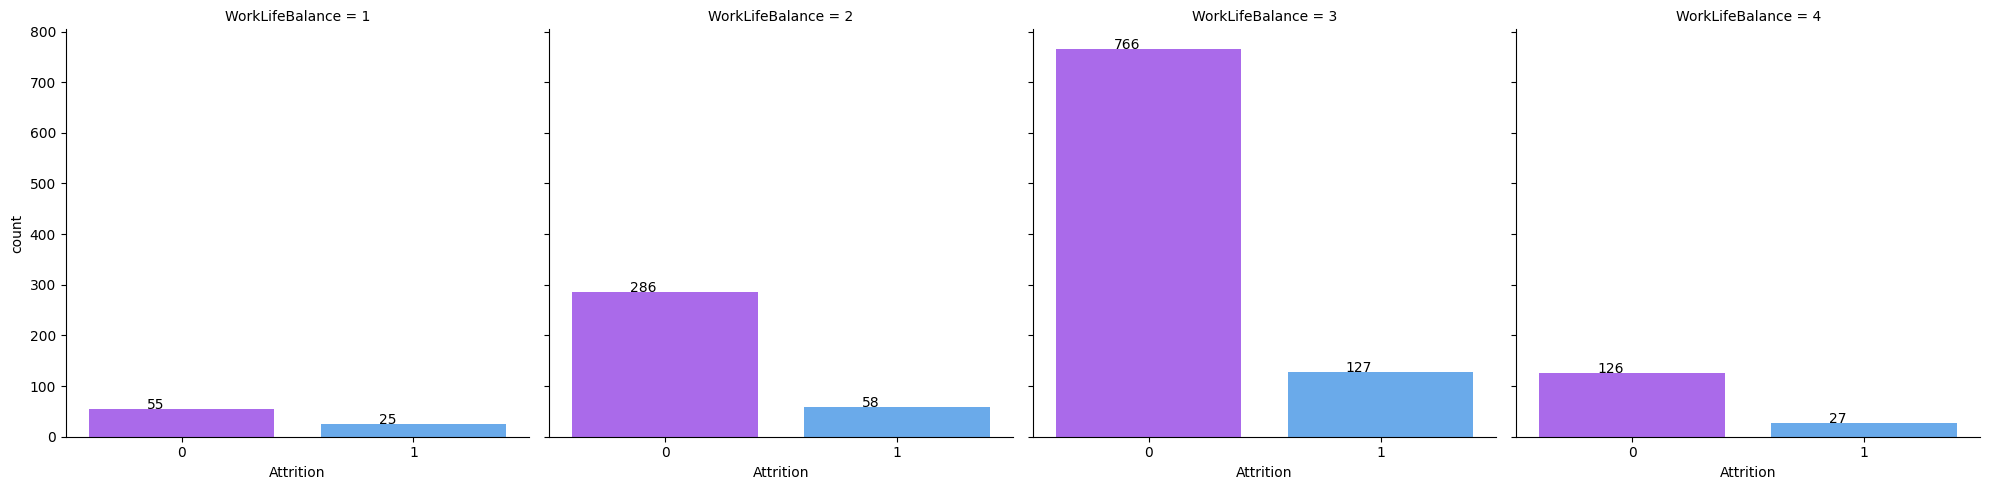

In [24]:
feature_plot('WorkLifeBalance')
feature_plot_with_target('WorkLifeBalance')

In [25]:
def feature_plot(feature):
    sns.countplot(y = feature, data=df, order=df[feature].value_counts().index)
    plt.xticks(rotation=0)
    plt.title(feature, fontsize=14)


In [26]:
def feature_plot_with_target(feature):
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(y=feature, hue='Attrition', data=df, order=df[feature].value_counts().index, palette='cool_r')
    plt.title(feature, fontsize=14)
    plt.legend(title='Attrition', loc='lower right', labels=['0', '1'])
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.0f'),
                    xy=(p.get_width()+1, p.get_y()+0.5*p.get_height()),
                    fontsize=9, color='black')
    plt.show()

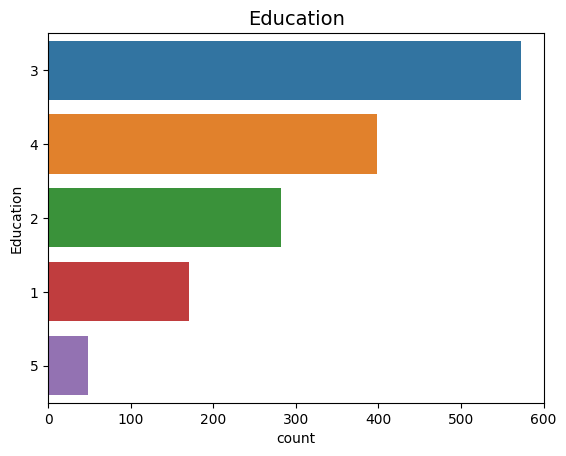

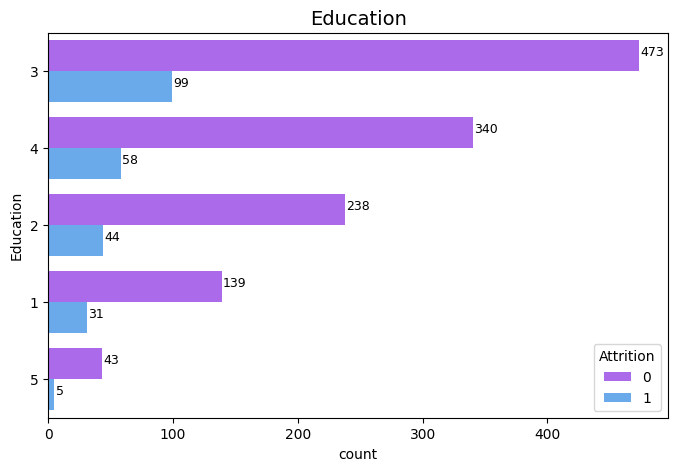

In [27]:
feature_plot('Education')
feature_plot_with_target('Education')

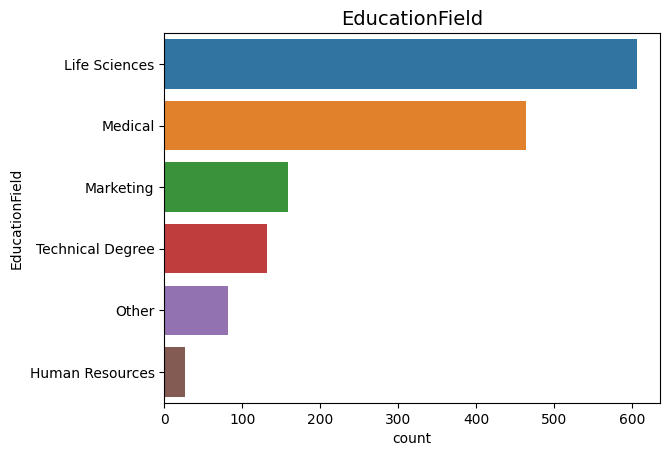

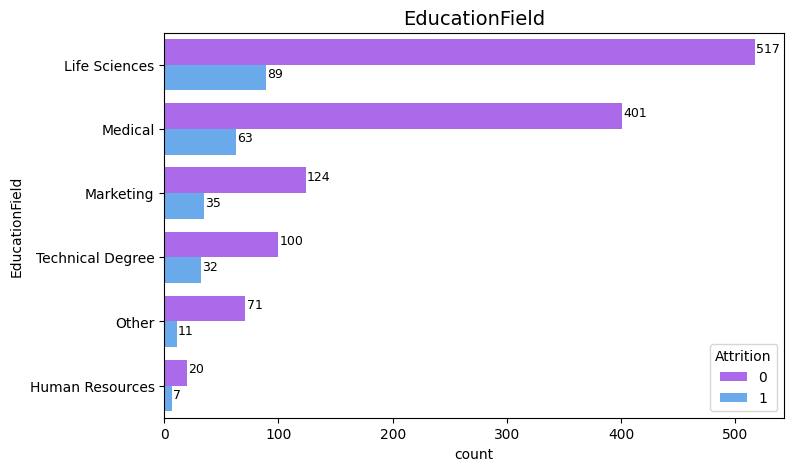

In [28]:
feature_plot('EducationField')
feature_plot_with_target('EducationField')

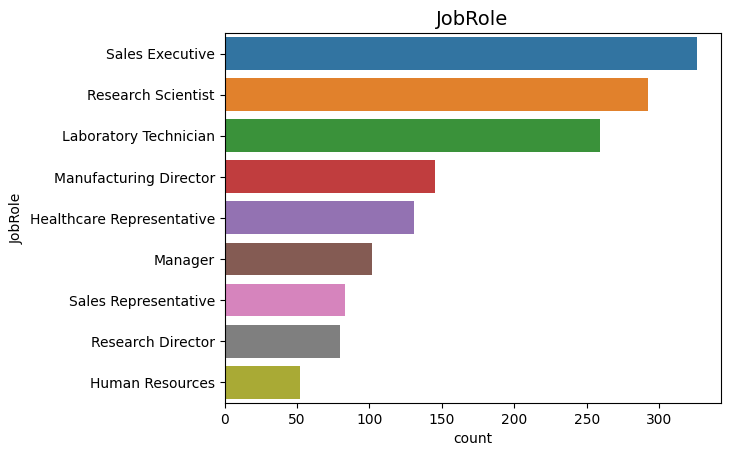

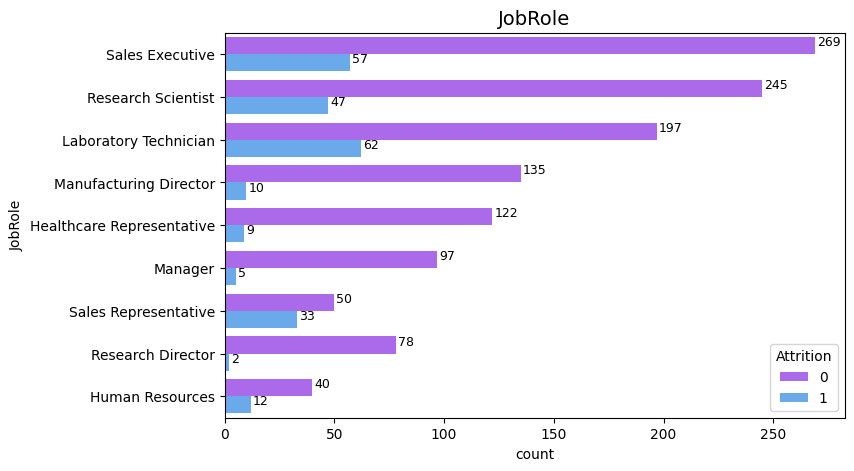

In [29]:
feature_plot('JobRole')
feature_plot_with_target('JobRole')

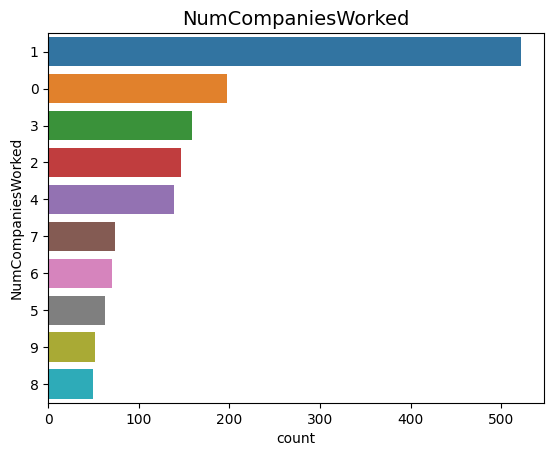

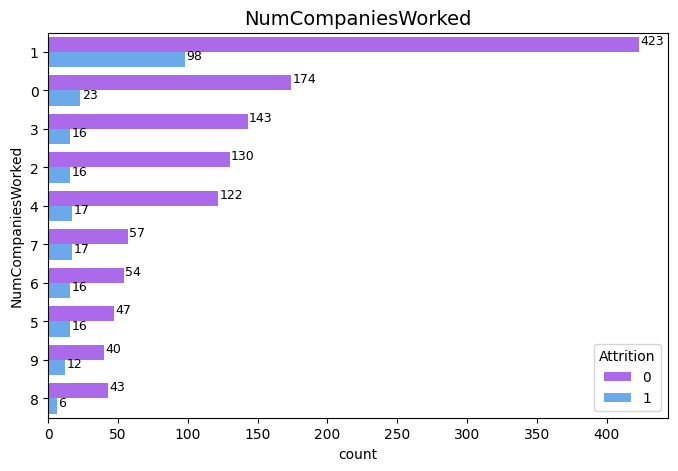

In [30]:
feature_plot('NumCompaniesWorked')
feature_plot_with_target('NumCompaniesWorked')

In [31]:
def hist_feat(feature):
    plt.figure(figsize=(10,5))
    sns.histplot(df[feature].dropna(), kde=True, color='purple',bins=30)

In [32]:
def dis_feat_with_target(feature):
    plt.figure(figsize=(8,5))
    sns.displot(data=df, x=feature, hue='Attrition', kind='kde')

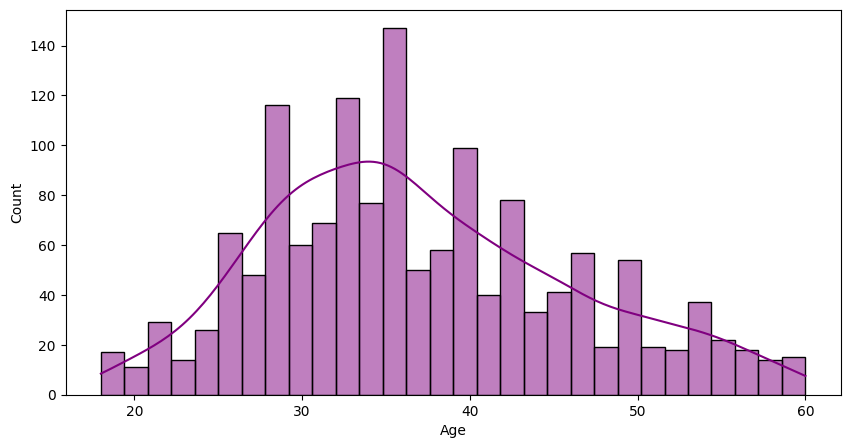

<Figure size 800x500 with 0 Axes>

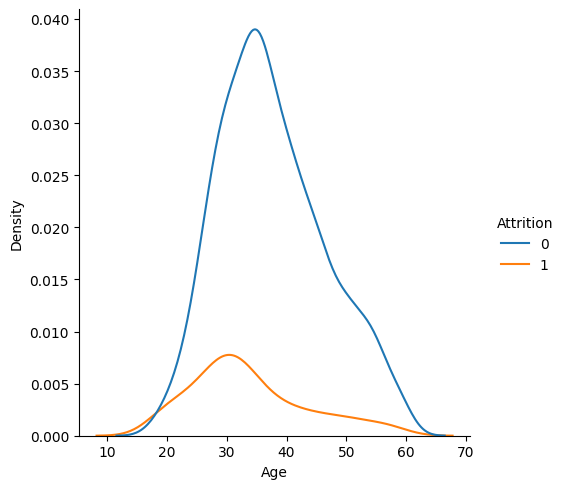

In [33]:
hist_feat('Age')
dis_feat_with_target('Age')

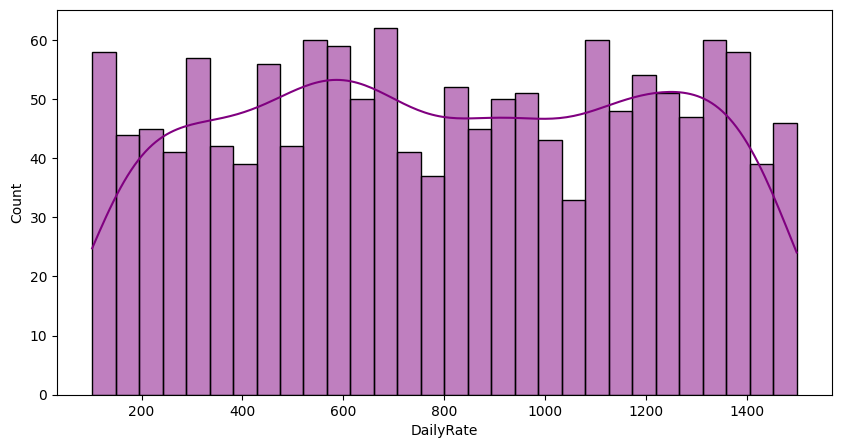

<Figure size 800x500 with 0 Axes>

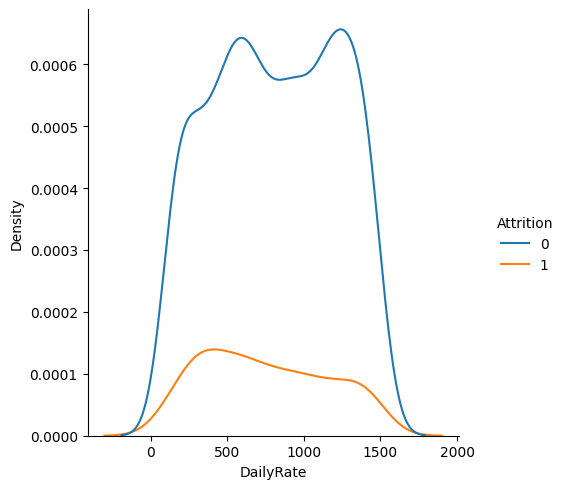

In [34]:
hist_feat('DailyRate')
dis_feat_with_target('DailyRate')

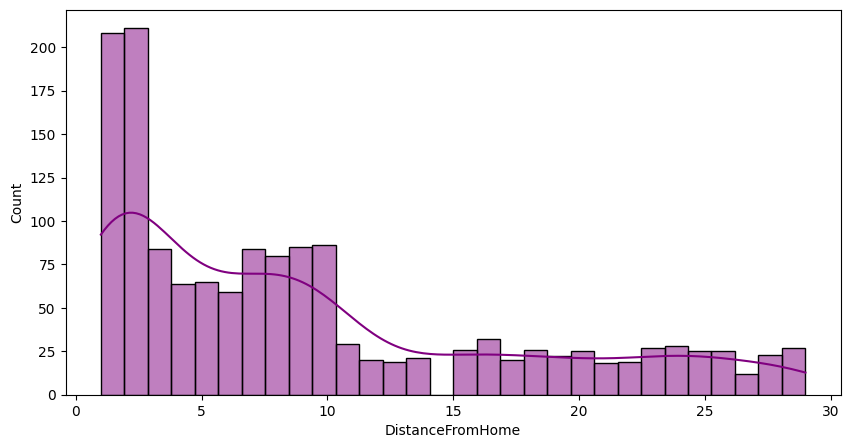

<Figure size 800x500 with 0 Axes>

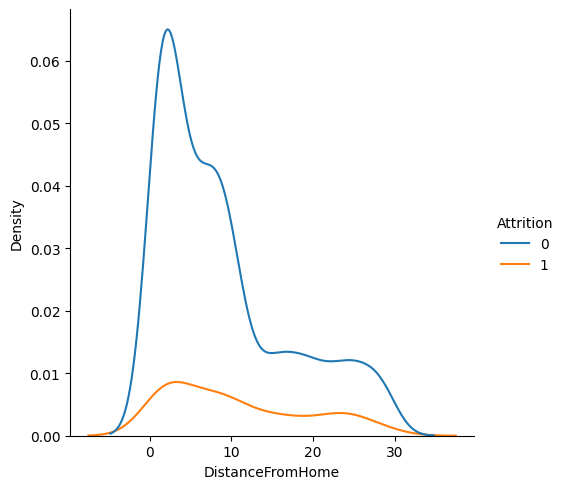

In [35]:
hist_feat('DistanceFromHome')
dis_feat_with_target('DistanceFromHome')

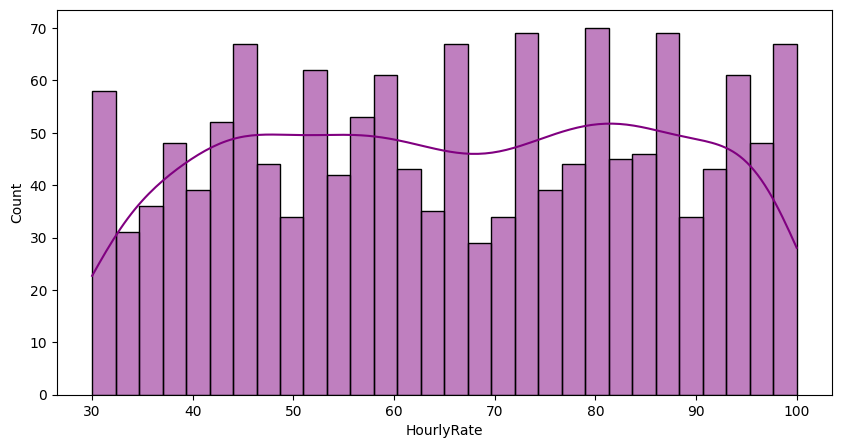

<Figure size 800x500 with 0 Axes>

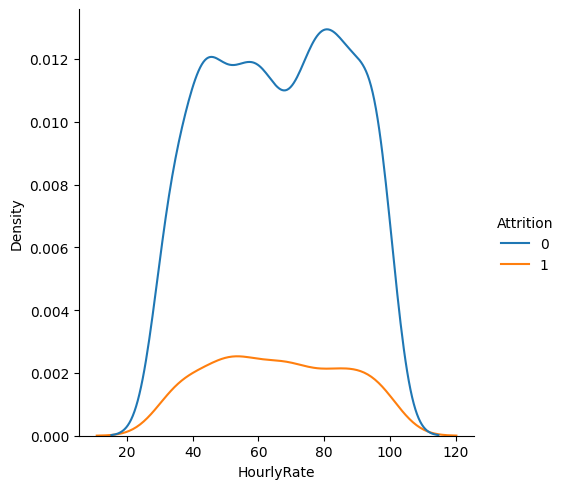

In [36]:
hist_feat('HourlyRate')
dis_feat_with_target('HourlyRate')

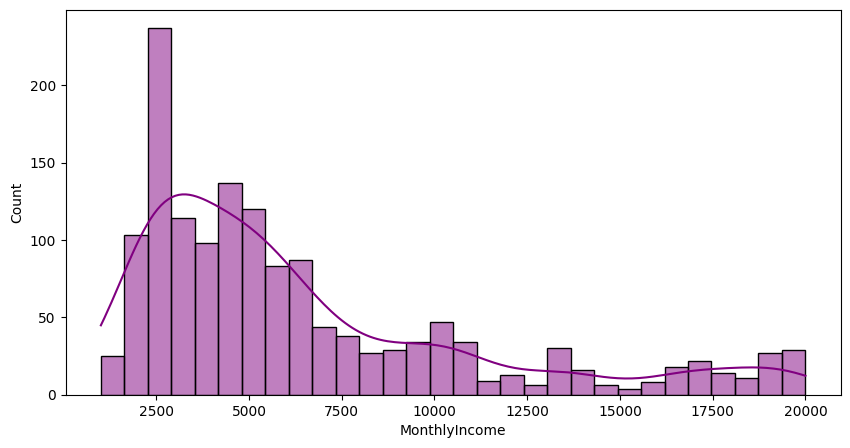

<Figure size 800x500 with 0 Axes>

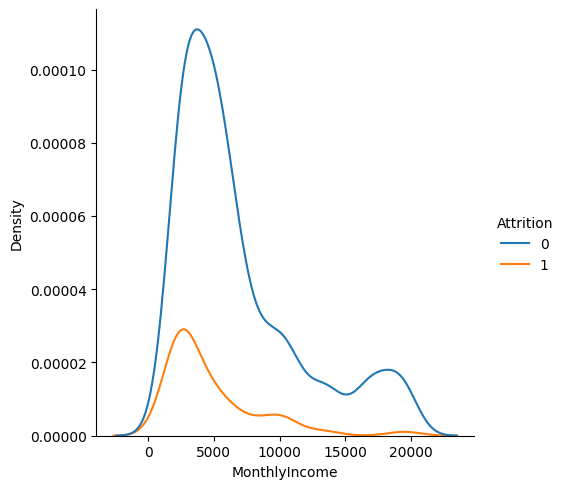

In [37]:
hist_feat('MonthlyIncome')
dis_feat_with_target('MonthlyIncome')

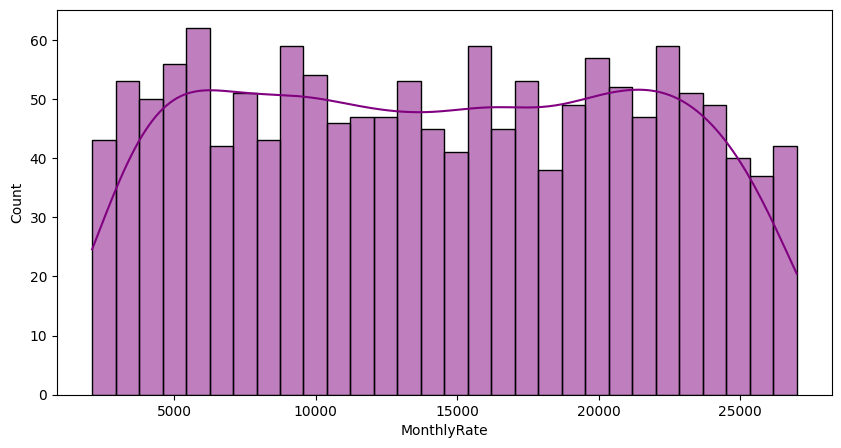

<Figure size 800x500 with 0 Axes>

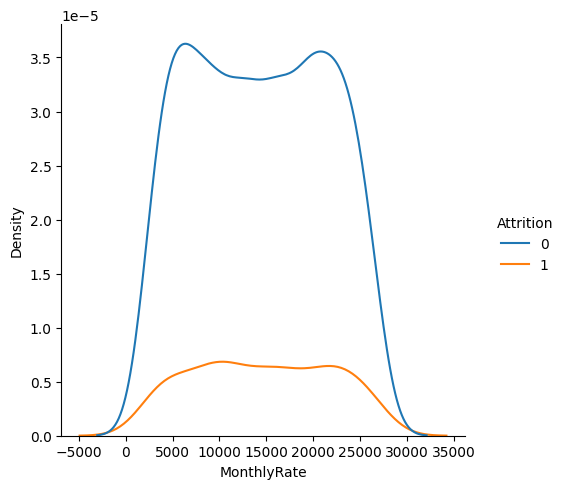

In [38]:
hist_feat('MonthlyRate')
dis_feat_with_target('MonthlyRate')

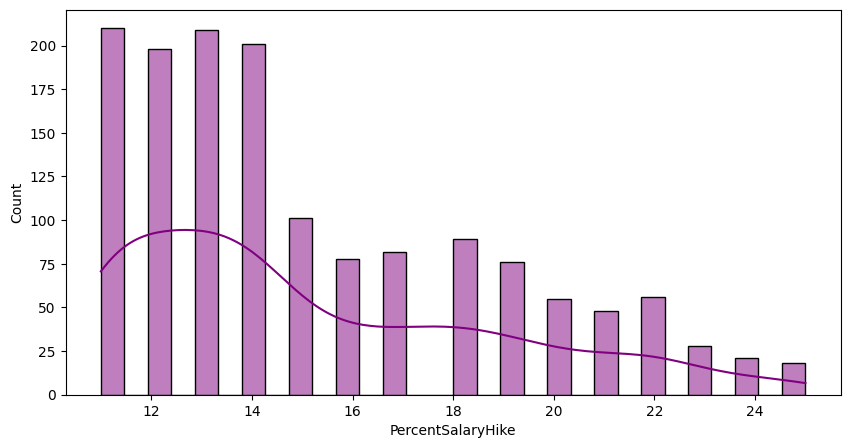

<Figure size 800x500 with 0 Axes>

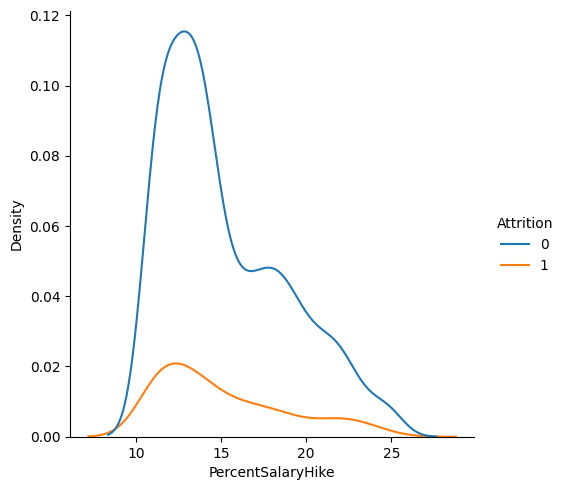

In [39]:
hist_feat('PercentSalaryHike')
dis_feat_with_target('PercentSalaryHike')

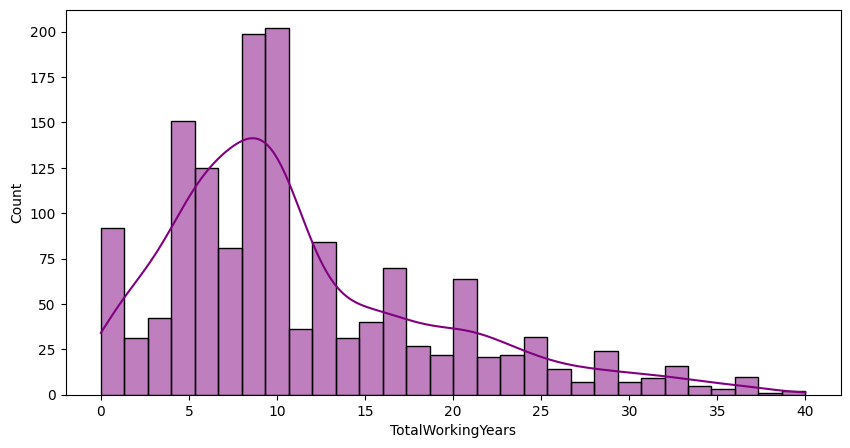

<Figure size 800x500 with 0 Axes>

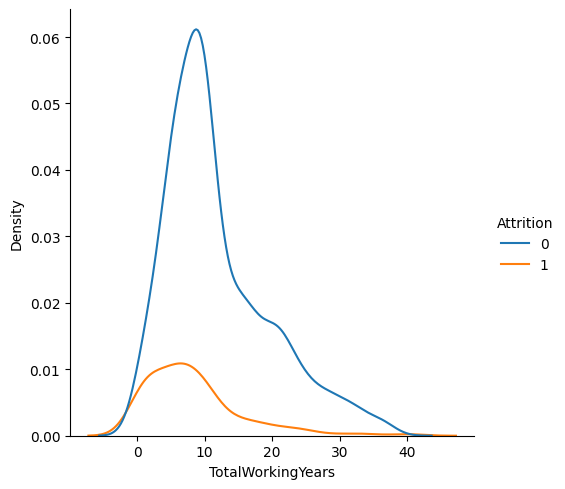

In [40]:
hist_feat('TotalWorkingYears')
dis_feat_with_target('TotalWorkingYears')

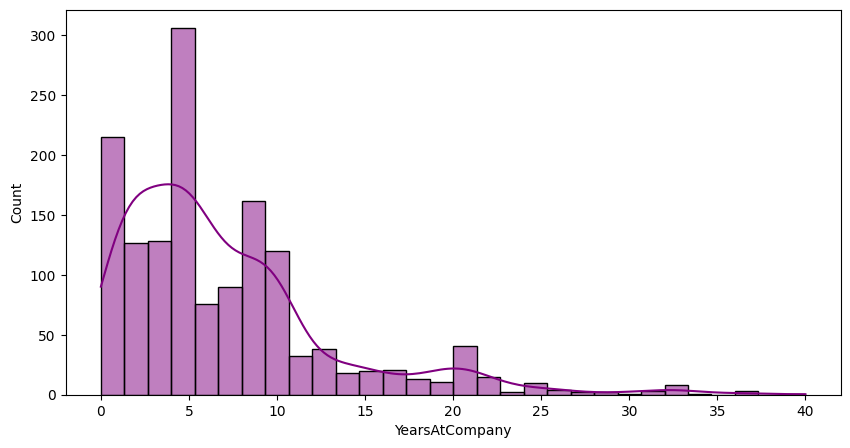

<Figure size 800x500 with 0 Axes>

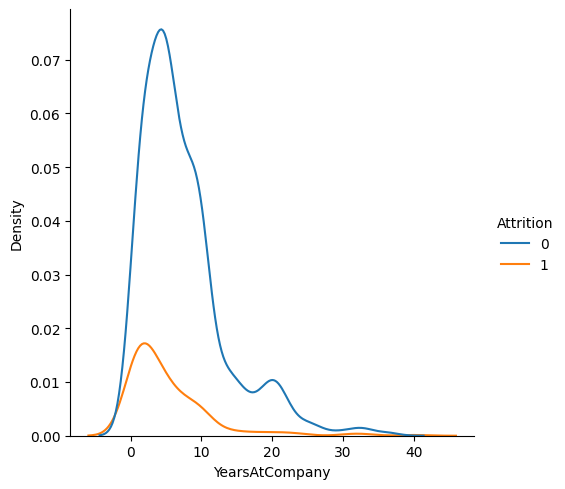

In [41]:
hist_feat('YearsAtCompany')
dis_feat_with_target('YearsAtCompany')

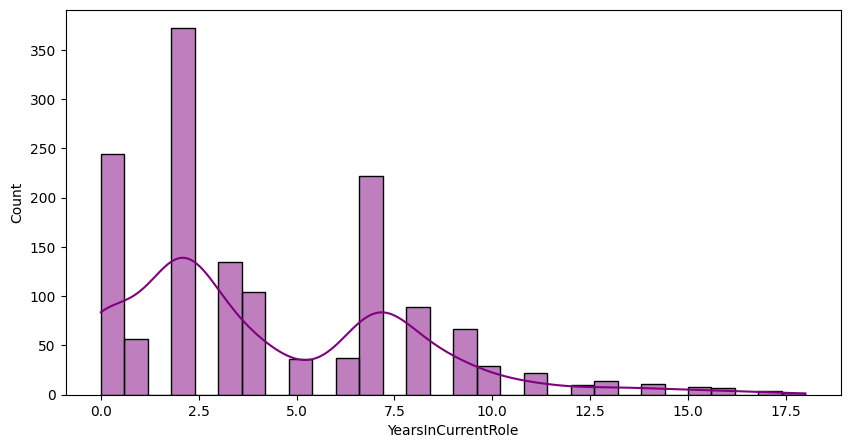

<Figure size 800x500 with 0 Axes>

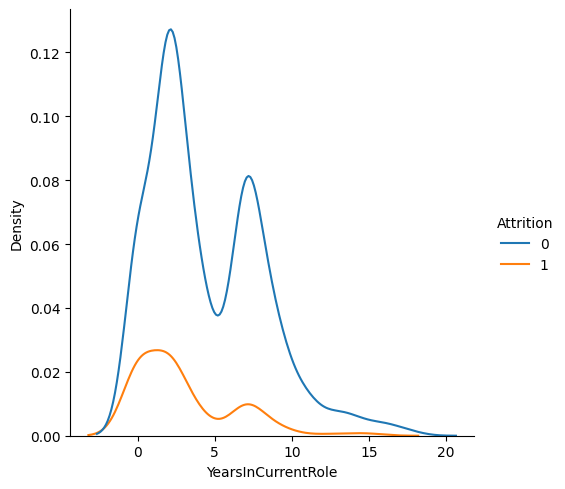

In [42]:
hist_feat('YearsInCurrentRole')
dis_feat_with_target('YearsInCurrentRole')

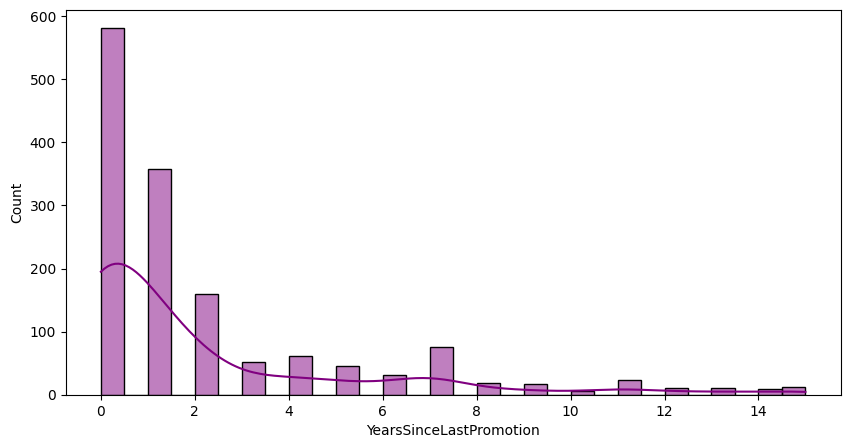

<Figure size 800x500 with 0 Axes>

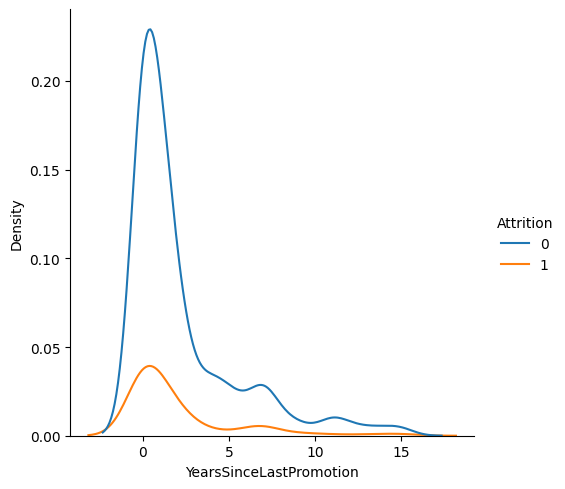

In [43]:
hist_feat('YearsSinceLastPromotion')
dis_feat_with_target('YearsSinceLastPromotion')

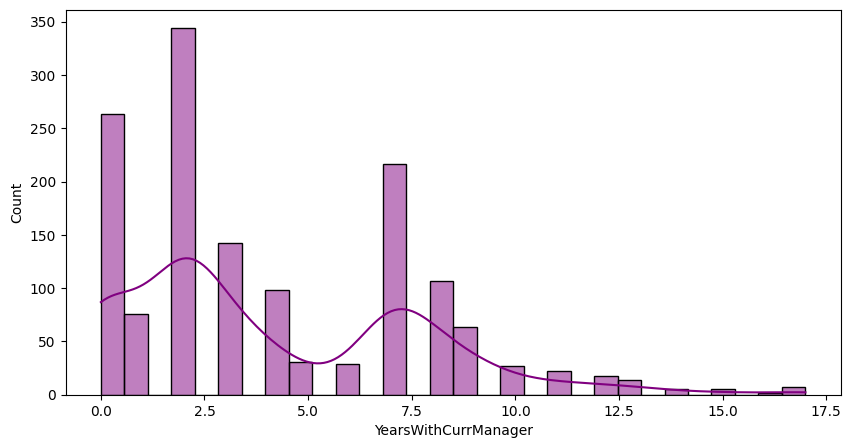

<Figure size 800x500 with 0 Axes>

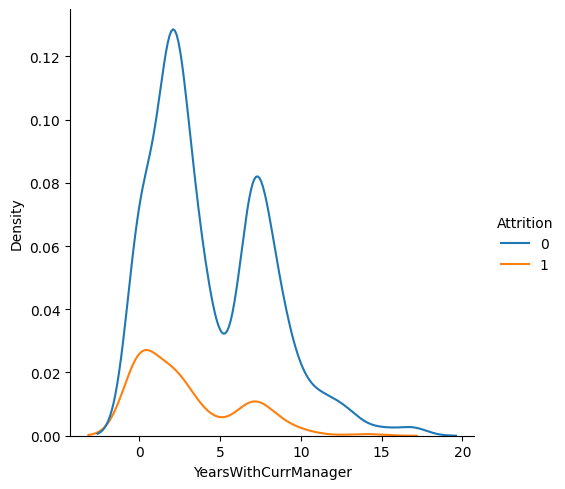

In [44]:
hist_feat('YearsWithCurrManager')
dis_feat_with_target('YearsWithCurrManager')

### Group the columns into diff category

In [45]:
category = df.select_dtypes(include='object')
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BusinessTravel  1470 non-null   object
 1   Department      1470 non-null   object
 2   EducationField  1470 non-null   object
 3   Gender          1470 non-null   object
 4   JobRole         1470 non-null   object
 5   MaritalStatus   1470 non-null   object
 6   Over18          1470 non-null   object
dtypes: object(7)
memory usage: 80.5+ KB


In [46]:
from sklearn import preprocessing

In [47]:
label_encoder = preprocessing.LabelEncoder()

encoded_BusinessTravel = label_encoder.fit_transform(df['BusinessTravel'])
encoded_Department = label_encoder.fit_transform(df['Department'])
encoded_EduField = label_encoder.fit_transform(df['EducationField'])
encoded_Gender = label_encoder.fit_transform(df['Gender'])
encoded_JobRole = label_encoder.fit_transform(df['JobRole'])
encoded_MaritalStatus = label_encoder.fit_transform(df['MaritalStatus'])


In [48]:
data = {
    "encoded_BusinessTravel": encoded_BusinessTravel,
    "encoded_Department": encoded_Department,
    "encoded_EduField": encoded_EduField,
    "encoded_Gender": encoded_Gender,
    "encoded_JobRole": encoded_JobRole,
    "encoded_MaritalStatus": encoded_MaritalStatus,
}

combined_df = pd.DataFrame(data)
combined_df

,encoded_BusinessTravel,encoded_Department,encoded_EduField,encoded_Gender,encoded_JobRole,encoded_MaritalStatus
0,2,2,1,0,7,2
1,1,1,1,1,6,1
2,2,1,4,1,2,2
3,1,1,1,0,6,1
4,2,1,3,1,2,1
...,...,...,...,...,...,...
1465,1,1,3,1,2,1
1466,2,1,3,1,0,1
1467,2,1,1,1,4,1
1468,1,2,3,1,7,1


In [49]:
drop_columns = ['BusinessTravel', 
                'Department',
                'EducationField', 
                'Gender',
                'JobRole',
                'MaritalStatus',
                'EmployeeCount',
                'EmployeeNumber',
                'Over18',
                'StandardHours']

new_df = df.drop(drop_columns, axis=1)

concatenated_df = pd.concat([new_df,combined_df], axis=1)
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EnvironmentSatisfaction   1470 non-null   int64
 6   HourlyRate                1470 non-null   int64
 7   JobInvolvement            1470 non-null   int64
 8   JobLevel                  1470 non-null   int64
 9   JobSatisfaction           1470 non-null   int64
 10  MonthlyIncome             1470 non-null   int64
 11  MonthlyRate               1470 non-null   int64
 12  NumCompaniesWorked        1470 non-null   int64
 13  OverTime                  1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

In [50]:
correlation = pd.DataFrame(concatenated_df.corr()['Attrition'])
correlation.sort_values(by='Attrition', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Attrition
Attrition,1.000000
OverTime,0.246118
encoded_MaritalStatus,0.162070
DistanceFromHome,0.077924
encoded_JobRole,0.067151
encoded_Department,0.063991
NumCompaniesWorked,0.043494
encoded_Gender,0.029453
encoded_EduField,0.026846
MonthlyRate,0.015170


In [51]:
Group1 = concatenated_df[['Age',
                          'DistanceFromHome',
                          'Education',
                          'encoded_EduField',
                          'encoded_Gender',
                          'encoded_MaritalStatus',
                          'NumCompaniesWorked',
                         ]]

Group2 = concatenated_df[['encoded_Department',
                          'JobInvolvement',
                          'JobLevel',
                          'encoded_JobRole',
                          'JobSatisfaction',
                          'PerformanceRating',
                          'RelationshipSatisfaction',
                          'EnvironmentSatisfaction',
                         ]]

Group3 = concatenated_df[['TotalWorkingYears',
                          'TrainingTimesLastYear',
                          'WorkLifeBalance',
                          'YearsAtCompany',
                          'YearsInCurrentRole',
                          'YearsSinceLastPromotion',
                          'YearsWithCurrManager',
                          'StockOptionLevel',    
                         ]]

Group4 = concatenated_df[['HourlyRate',
                          'DailyRate',
                          'MonthlyIncome',
                          'MonthlyRate',
                          'OverTime',
                          'PercentSalaryHike',
                          'encoded_BusinessTravel',
                         ]]

Prediction = df[['Attrition']]

### Predictive modelling

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [53]:
def target_group(group):
    
    X_train,X_test,y_train,y_test = train_test_split(group,Prediction, test_size=0.30, random_state=42)
    
    model = RandomForestClassifier()
    
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    # Calculate AUC
    y_prob = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC score: {auc:.3f}")
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    plt.show()
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model accuracy: {accuracy}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, cmap="viridis", fmt='g')
    plt.xlabel("Predicted attrition")
    plt.ylabel("True attrition")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    

AUC score: 0.621


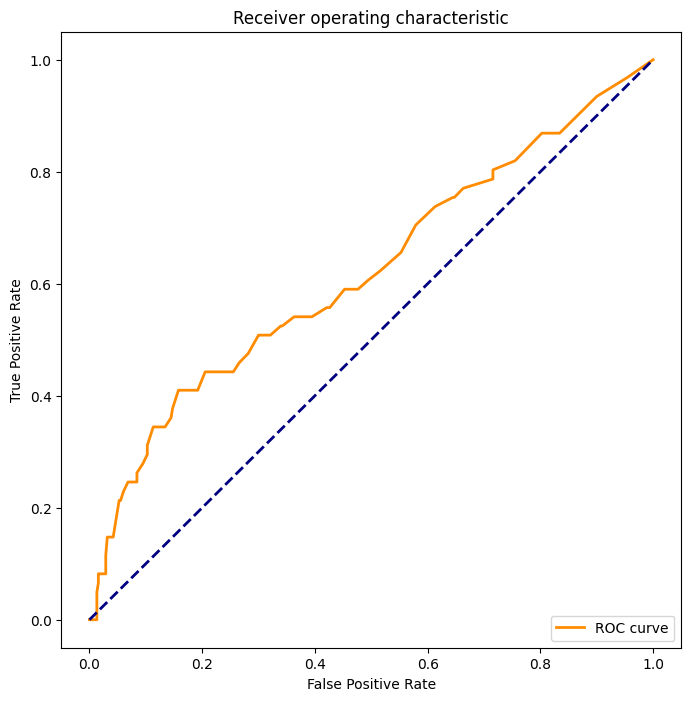

Model accuracy: 0.8526077097505669


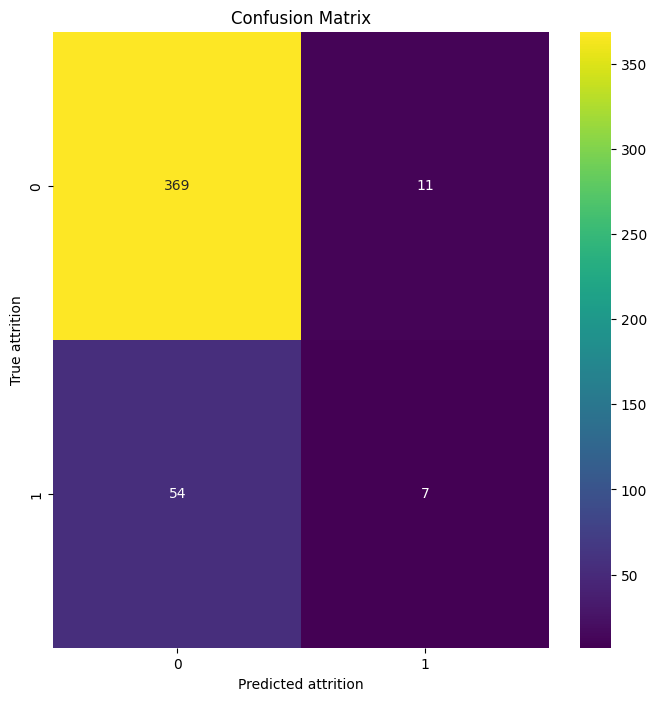

In [54]:
target_group(Group1)

AUC score: 0.705


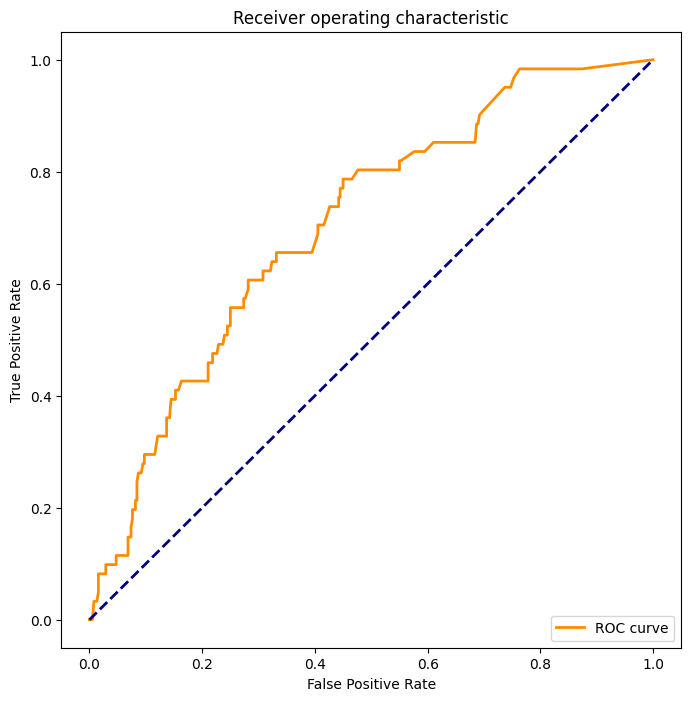

Model accuracy: 0.8231292517006803


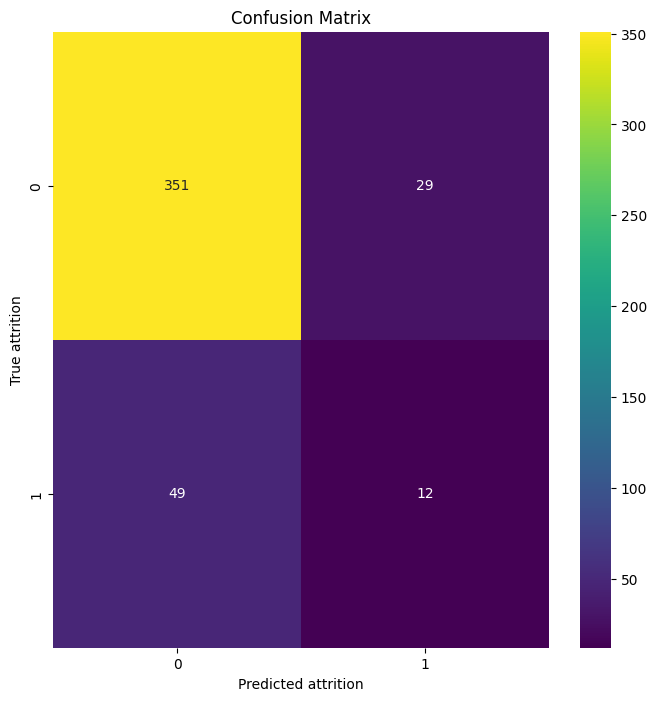

In [55]:
target_group(Group2)

AUC score: 0.550


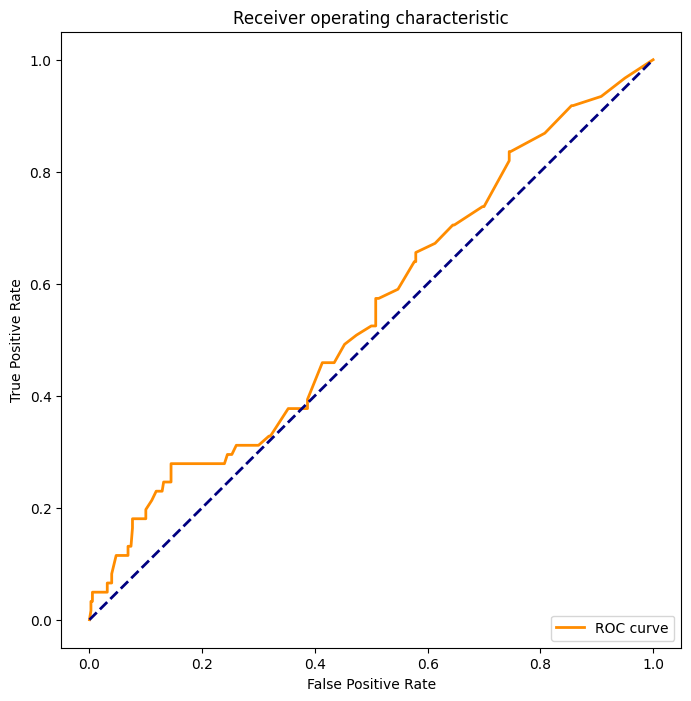

Model accuracy: 0.8390022675736961


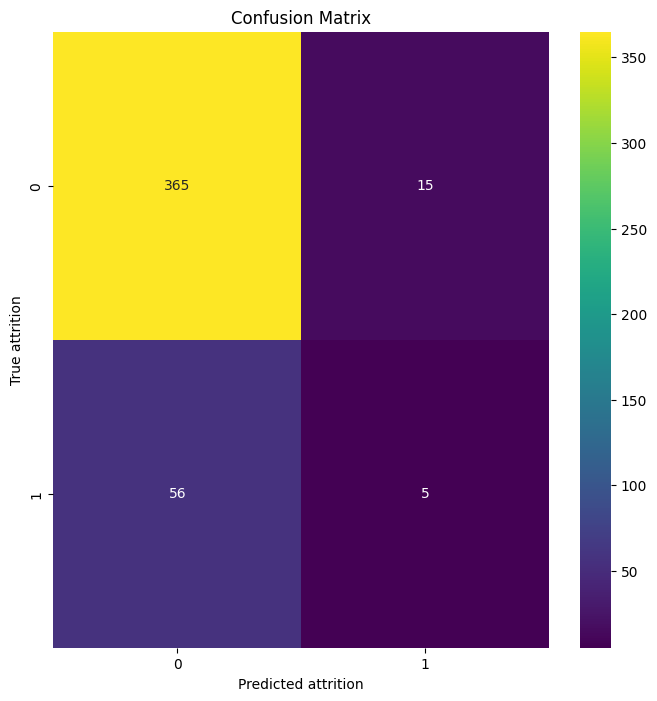

In [56]:
target_group(Group3)

AUC score: 0.691


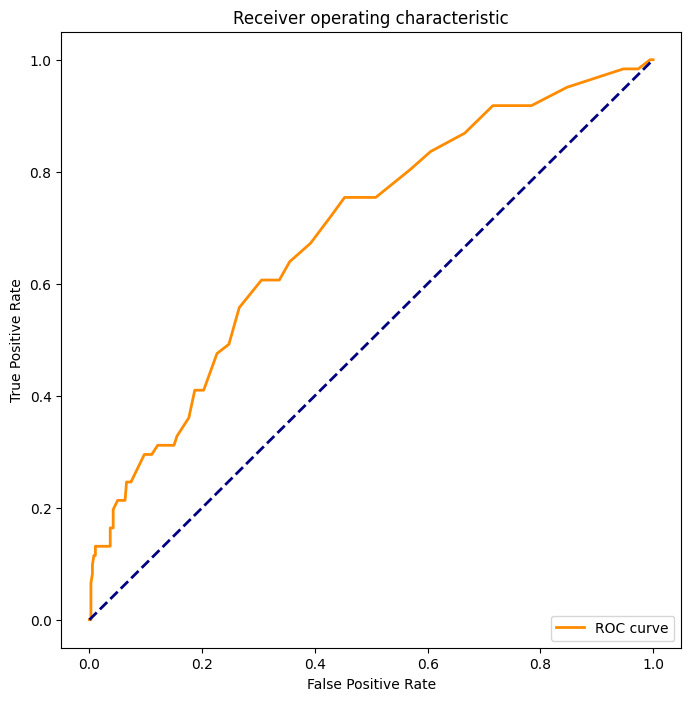

Model accuracy: 0.8662131519274376


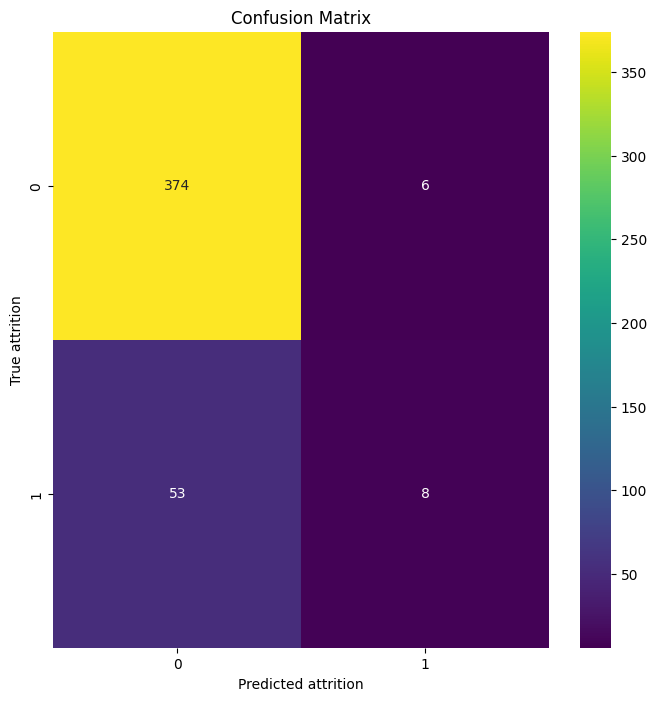

In [57]:
target_group(Group4)

### Model evaluation

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
def target_group(group):
    
    Prediction = df['Attrition']
    
    # Create a random forest classifier object
    clf = RandomForestClassifier()

    # Perform 10-fold cross-validation on the random forest classifier
    scores = cross_val_score(clf, group, Prediction, cv=10)

    # Print the mean accuracy and standard deviation of the cross-validation scores
    print("Mean accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [60]:
target_group(Group1)

Mean accuracy: 0.84 (+/- 0.02)


In [61]:
target_group(Group2)

Mean accuracy: 0.81 (+/- 0.05)


In [62]:
target_group(Group3)

Mean accuracy: 0.82 (+/- 0.04)


In [63]:
target_group(Group4)

Mean accuracy: 0.85 (+/- 0.03)
